In [5]:

import tensorflow as tf
from tensorflow.python.compiler.mlcompute import mlcompute
mlcompute.set_mlc_device(device_name='gpu')
tf.compat.v1.disable_eager_execution()
print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt


2.4.0-rc0


In [6]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape=(28,28,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(4,activation='softmax')
])

In [7]:
from tensorflow.keras.optimizers import RMSprop
model.compile(
loss=tf.keras.losses.categorical_crossentropy,
optimizer='adam',
metrics=['accuracy'])

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
Generator=ImageDataGenerator(validation_split=0.2,rescale=1/255)
train_gen=Generator.flow_from_directory(
'./animal/',
target_size=(28,28),
batch_size=64,
class_mode='categorical',
subset='training')

val_generator = Generator.flow_from_directory(
    './animal',
    target_size=(28,28),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

Found 8482 images belonging to 4 classes.
Found 2118 images belonging to 4 classes.


In [9]:
history=model.fit(train_gen,
                  steps_per_epoch=210,
                  validation_data=train_gen,
                  validation_steps=100,
                  epochs=15,
                  verbose=1)

Epoch 1/15
210/210 [==============================] - ETA: 0s - batch: 104.5000 - size: 63.8571 - loss: 1.2234 - accuracy: 0.4771

/opt/homebrew/Caskroom/miniforge/base/envs/tensor_flow/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


210/210 [==============================] - 28s 133ms/step - batch: 104.5000 - size: 63.8571 - loss: 1.2234 - accuracy: 0.4771 - val_loss: 1.0951 - val_accuracy: 0.5430
Epoch 2/15
210/210 [==============================] - 28s 132ms/step - batch: 104.5000 - size: 63.5714 - loss: 1.0367 - accuracy: 0.5669 - val_loss: 1.0190 - val_accuracy: 0.5813
Epoch 3/15
210/210 [==============================] - 27s 128ms/step - batch: 104.5000 - size: 63.8571 - loss: 0.9210 - accuracy: 0.6230 - val_loss: 0.8971 - val_accuracy: 0.6306
Epoch 4/15
210/210 [==============================] - 28s 133ms/step - batch: 104.5000 - size: 63.8571 - loss: 0.8488 - accuracy: 0.6496 - val_loss: 0.7911 - val_accuracy: 0.6778
Epoch 5/15
210/210 [==============================] - 27s 129ms/step - batch: 104.5000 - size: 63.7143 - loss: 0.7943 - accuracy: 0.6701 - val_loss: 0.7056 - val_accuracy: 0.7034
Epoch 6/15
210/210 [==============================] - 27s 131ms/step - batch: 104.5000 - size: 63.7143 - loss: 0.718

In [10]:
training_loss = history.history['loss']
val_loss=history.history['val_loss']
epoch_count = range(1, len(training_loss) + 1)

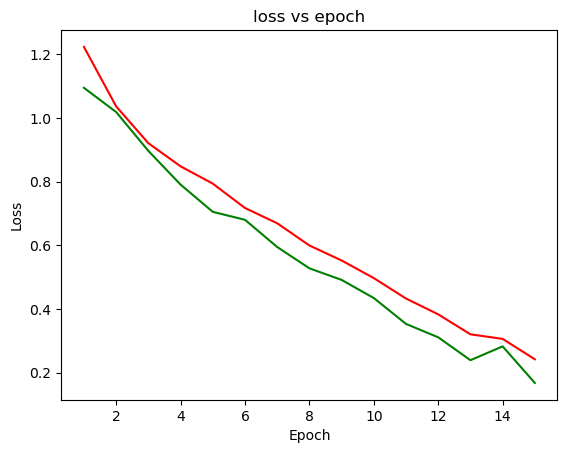

In [11]:
plt.plot(epoch_count, training_loss, 'r')
plt.plot(epoch_count, val_loss, 'g')
plt.title('loss vs epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [12]:
training_acc = history.history['accuracy']
val_acc=history.history['val_accuracy']
epoch_count = range(1, len(training_loss) + 1)

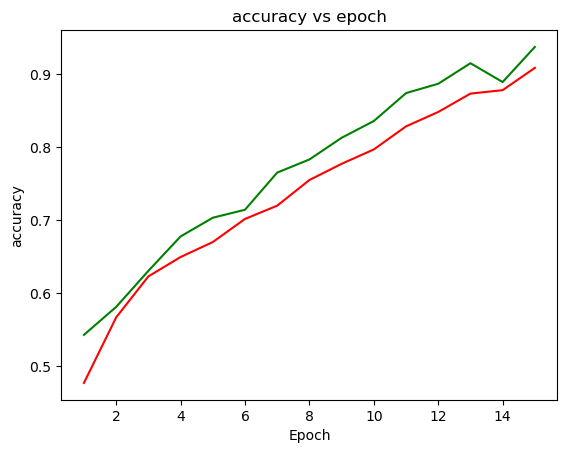

In [13]:
plt.plot(epoch_count, training_acc, 'r')
plt.plot(epoch_count, val_acc, 'g')
plt.title('accuracy vs epoch')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show();